In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pylab as plt

from astropy.io import fits

import sys
sys.path.append('/home/scratch/psalas/LASSI/lassi-analysis_v2')

from lassiAnalysis import maskXYZ,imageSmoothedData,regridXYZMasked
from parabolas import fitLeicaScan
from plotting import scatter3dPlot, surfacePlot

In [3]:
def load_lassi_fits(filename):
    
    hdu = fits.open(filename)
    data = hdu[1].data
    x = data['X']
    y = data['Y']
    z = data['Z']
    #i = data['INTENSIT']
    #d = data['DMJD']
    
    return x,y,z #,i,d

In [4]:
n = 512
guess=[60, 0, 0, -49, 0, 0]
path = '/home/gbtdata/TLASSI_200219/'

In [20]:
filename = "{0}/LASSI/{1}".format(path, "2020_02_19_16:21:16.smoothed.fits")

In [21]:
x,y,z = load_lassi_fits(filename)

Plotting 10.00 percent of data
Now length of data is 26214


<IPython.core.display.Javascript object>


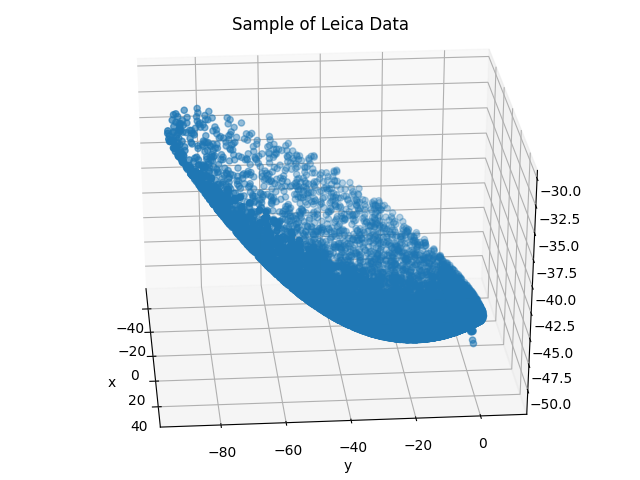

In [18]:
scatter3dPlot(x, y, z, "Sample of Leica Data", sample=10.0)

In [26]:
outData = maskXYZ(x.reshape(n,n), y.reshape(n,n), z.reshape(n,n), 
                  n=n, guess=guess, bounds=None, radialMask=True, maskRadius=49)

/home/scratch/psalas/LASSI/lassi-analysis_v2/lassiAnalysis.py:395: RuntimeWarning: invalid value encountered in less
  mask = (((xrr - xc)**2. + (yrr - yc)**2.) < maskRadius**2.)
/home/scratch/psalas/LASSI/lassi-analysis_v2/lassiAnalysis.py:424: RuntimeWarning: invalid value encountered in less
  mask = (((xrrm - xc)**2. + (yrrm - yc)**2.) < maskRadius**2.)


In [55]:
def imageSmoothedData2(x, y, z, N, filename=None):
    x.shape = (N,N)
    y.shape = (N,N)
    z.shape = (N,N)
    masked = maskXYZ(x, y, z, n=N, guess=[60., 0., 0., -49., 0., 0.], bounds=None, radialMask=True, maskRadius=49.)
    xx, yy, zz = regridXYZMasked(x, y, masked['fitResidual'], n=N)
    surfacePlot(xx,
                yy,
                np.log10(abs(np.diff(zz))),
                title="Pixel by pixel difference",
                vMin=-5,
                vMax=0,
                colorbarLabel="Log10[m]",
                filename=filename)

    print("RMS on parabola subtracted scan: {} m".format(np.ma.std(zz)))

/home/scratch/psalas/LASSI/lassi-analysis_v2/lassiAnalysis.py:395: RuntimeWarning: invalid value encountered in less
  mask = (((xrr - xc)**2. + (yrr - yc)**2.) < maskRadius**2.)
/home/scratch/psalas/LASSI/lassi-analysis_v2/lassiAnalysis.py:424: RuntimeWarning: invalid value encountered in less
  mask = (((xrrm - xc)**2. + (yrrm - yc)**2.) < maskRadius**2.)


<IPython.core.display.Javascript object>


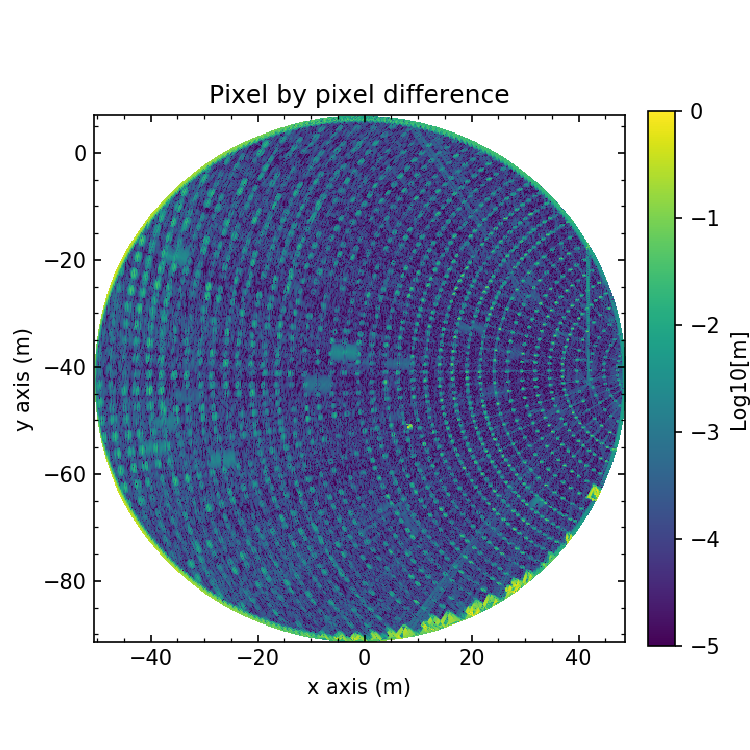

RMS on parabola subtracted scan: 0.0 m


In [38]:
imageSmoothedData(x, y, z, n)

/home/scratch/psalas/LASSI/lassi-analysis_v2/lassiAnalysis.py:395: RuntimeWarning: invalid value encountered in less
  mask = (((xrr - xc)**2. + (yrr - yc)**2.) < maskRadius**2.)
/home/scratch/psalas/LASSI/lassi-analysis_v2/lassiAnalysis.py:424: RuntimeWarning: invalid value encountered in less
  mask = (((xrrm - xc)**2. + (yrrm - yc)**2.) < maskRadius**2.)


<IPython.core.display.Javascript object>


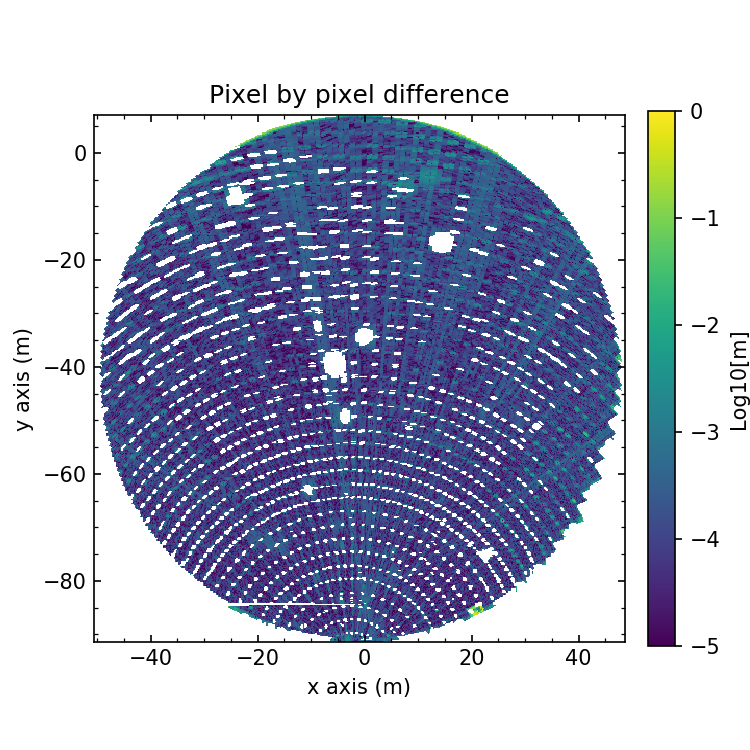

RMS on parabola subtracted scan: 0.02338474651973311 m


In [56]:
imageSmoothedData2(x, y, z, n)

/home/scratch/psalas/LASSI/lassi-analysis_v2/lassiAnalysis.py:395: RuntimeWarning: invalid value encountered in less
  mask = (((xrr - xc)**2. + (yrr - yc)**2.) < maskRadius**2.)
/home/scratch/psalas/LASSI/lassi-analysis_v2/lassiAnalysis.py:424: RuntimeWarning: invalid value encountered in less
  mask = (((xrrm - xc)**2. + (yrrm - yc)**2.) < maskRadius**2.)


<IPython.core.display.Javascript object>


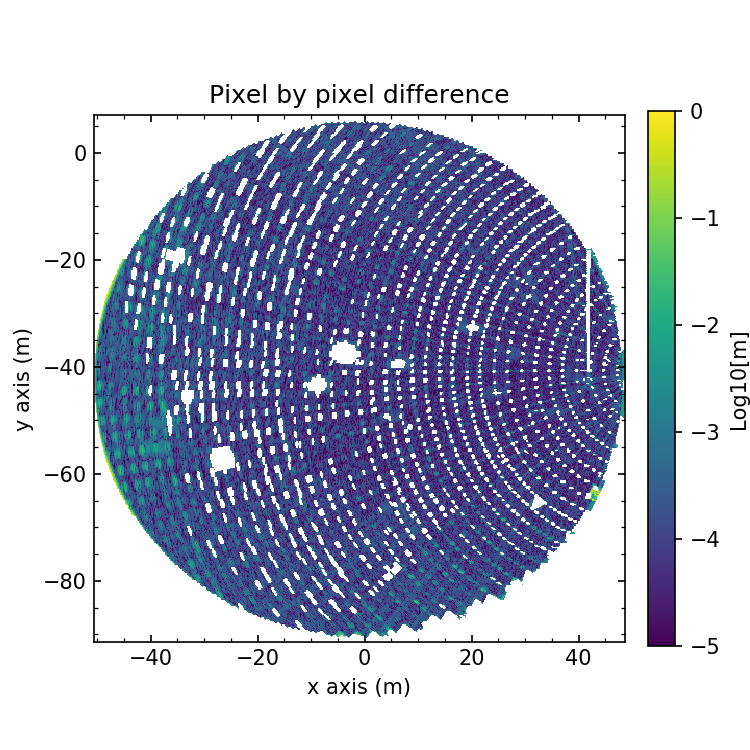

RMS on parabola subtracted scan: 0.022474312867240935 m


In [39]:
filename = "{0}/LASSI/{1}".format(path, "2020_02_19_16:11:58.smoothed.fits")
xr,yr,zr = load_lassi_fits(filename)
imageSmoothedData2(xr, yr, zr, n)

<IPython.core.display.Javascript object>


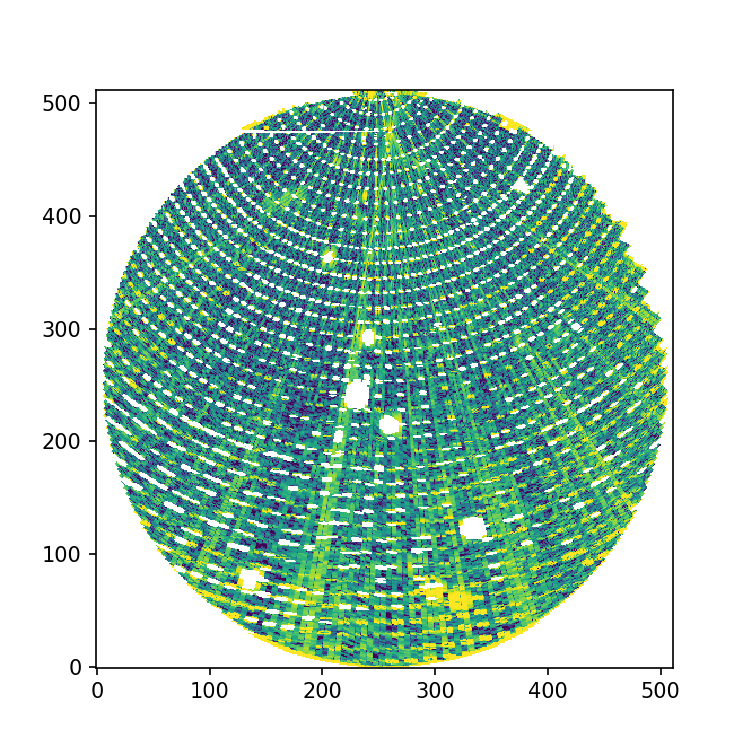

In [52]:
plt.figure(figsize=(5, 5), dpi=150, frameon=False)
plt.imshow(np.log10(abs(np.diff(zz))), origin='lower', vmin=-5, vmax=-3)

In [40]:
masked = maskXYZ(x, y, z, n=n, guess=[60., 0., 0., -49., 0., 0.], bounds=None, radialMask=True, maskRadius=49.)
xx, yy, zz = regridXYZMasked(x, y, masked['fitResidual'], n=n)
masked = maskXYZ(xr, yr, zr, n=n, guess=[60., 0., 0., -49., 0., 0.], bounds=None, radialMask=True, maskRadius=49.)
xxr, yyr, zzr = regridXYZMasked(xr, yr, masked['fitResidual'], n=n)

/home/scratch/psalas/LASSI/lassi-analysis_v2/lassiAnalysis.py:395: RuntimeWarning: invalid value encountered in less
  mask = (((xrr - xc)**2. + (yrr - yc)**2.) < maskRadius**2.)
/home/scratch/psalas/LASSI/lassi-analysis_v2/lassiAnalysis.py:424: RuntimeWarning: invalid value encountered in less
  mask = (((xrrm - xc)**2. + (yrrm - yc)**2.) < maskRadius**2.)
/home/scratch/psalas/LASSI/lassi-analysis_v2/lassiAnalysis.py:395: RuntimeWarning: invalid value encountered in less
  mask = (((xrr - xc)**2. + (yrr - yc)**2.) < maskRadius**2.)
/home/scratch/psalas/LASSI/lassi-analysis_v2/lassiAnalysis.py:424: RuntimeWarning: invalid value encountered in less
  mask = (((xrrm - xc)**2. + (yrrm - yc)**2.) < maskRadius**2.)


<IPython.core.display.Javascript object>


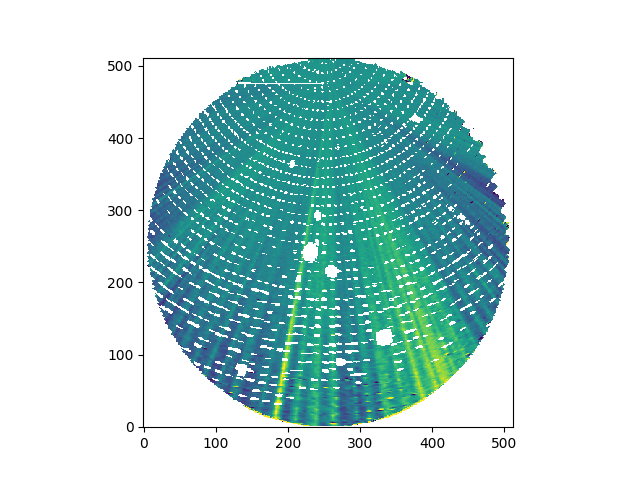

In [42]:
plt.figure()
plt.imshow(zz - zzr, origin='lower', vmin=-5e-3, vmax=5e-3)

Plotting  5.00 percent of data
Now length of data is 79727


<IPython.core.display.Javascript object>


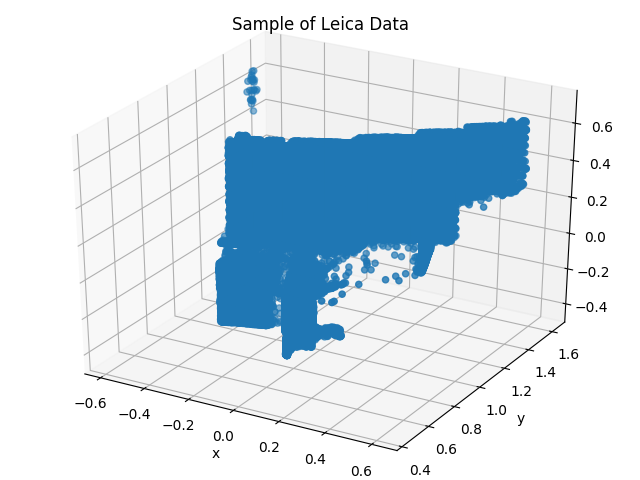

In [6]:
filename = "/export/simdata/JUNK/LASSI/2020_04_09_12:27:45.fits"
x,y,z = load_lassi_fits(filename)

Plotting  1.00 percent of data
Now length of data is 15945


<IPython.core.display.Javascript object>


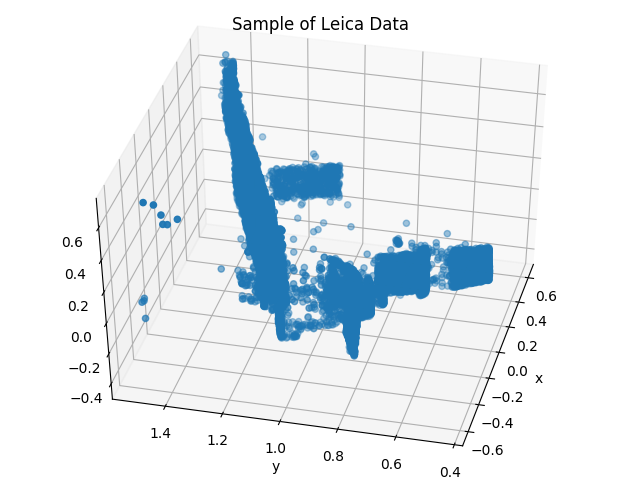

In [7]:
scatter3dPlot(x, y, z, "Sample of Leica Data", sample=1.0)

Plotting  1.00 percent of data
Now length of data is 155296


<IPython.core.display.Javascript object>


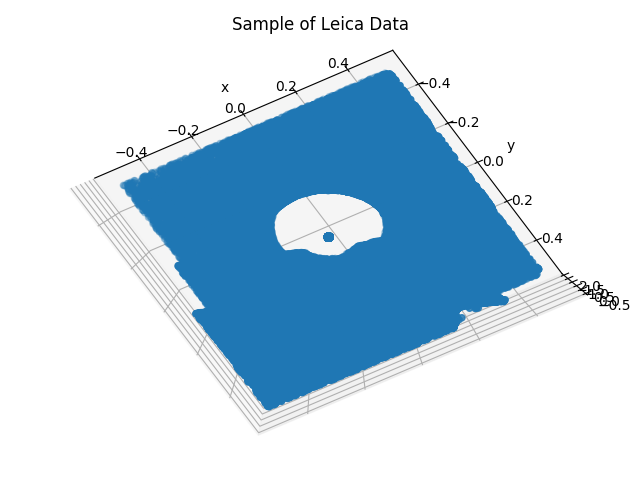

In [26]:
mask = (x < 0.5) & (x > -0.5) & (y < 0.5) & (y > -0.5)
scatter3dPlot(x[mask], y[mask], z[mask], "Sample of Leica Data", sample=1.0)

In [20]:
filename = "/export/simdata/TINT_200409/LASSI/2020_04_09_13:56:43.fits"
x,y,z = load_lassi_fits(filename)

Plotting  0.10 percent of data
Now length of data is 49169


<IPython.core.display.Javascript object>


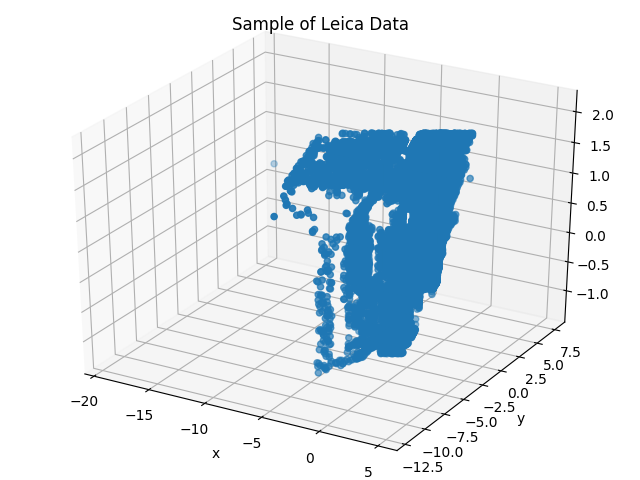

In [24]:
scatter3dPlot(x, y, z, "Sample of Leica Data", sample=0.1)

In [30]:
hdu = fits.open("/export/simdata/TINT_200409/LASSI/2020_04_09_13:56:43.fits")
hdu[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'NRAO Green Bank'    /                                                
INSTRUME= 'LASSI   '           / device or program of origin                    
GBTMCVER= 'lassi   '           / telescope control software release             
FITSVER = '2.1     '           / FITS definition version for this device        
DATEBLD = 'DATEBLD  goes  here' / time program was linked                       
SIMULATE=                    0 / Is the instrument in simulate mode?            
DATE-OBS= '2020-04-09T13:56:

In [31]:
hdu = fits.open("/export/simdata/TINT_200409/LASSI/2020_04_09_14:18:09.fits")
hdu[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'NRAO Green Bank'    /                                                
INSTRUME= 'LASSI   '           / device or program of origin                    
GBTMCVER= 'lassi   '           / telescope control software release             
FITSVER = '2.1     '           / FITS definition version for this device        
DATEBLD = 'DATEBLD  goes  here' / time program was linked                       
SIMULATE=                    0 / Is the instrument in simulate mode?            
DATE-OBS= '2020-04-09T14:18:

In [32]:
filename = "/export/simdata/TINT_200409/LASSI/2020_04_09_14:18:09.fits"
x,y,z = load_lassi_fits(filename)

Plotting  0.10 percent of data
Now length of data is 7995


<IPython.core.display.Javascript object>


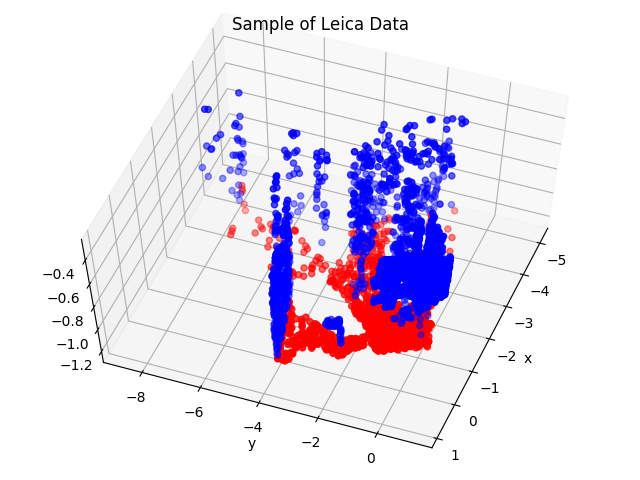

Plotting  0.10 percent of data
Now length of data is 1941


In [43]:
r = 10.
mask = (x < r) & (x > -r) & (y < r) & (y > -r) & (z < -0.3)
mask_ = (z[mask] <= -1.1)
fig, axes = scatter3dPlot(x[mask][~mask_], y[mask][~mask_], z[mask][~mask_], "Sample of Leica Data", sample=0.1)
fig, axes = scatter3dPlot(x[mask][mask_], y[mask][mask_], z[mask][mask_], sample=0.1, fig=fig, axes=axes, color='r')